# Alternative Bootstrap Confidence Interval Methods (asymptotic dependence)

Notebook to explore alternative methods of constructing bootstrap confidence intervals

The 10000 sample size refers to 100 bootstrap samples, akin to what was used in the original paper for comparison

In [1]:
library(ggplot2)

In [2]:
# source functions
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/orig_isolines.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/confidenceIntervals.R')
source('/global/u1/j/jbbutler/isolines_uq/scripts/R/utils.R')

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



In [3]:
path <- '/global/u1/j/jbbutler/isolines_uq/results/fixed_coord_bootstrap/'

In [4]:
na_tol <- 0.05
alpha <- 0.05

## Fixing $X_{2} = 5.63$, Predict true $X_{1} = 5.63$ (UNTRUSTED)

### B = 500

In [27]:
confints1000_500_1 <- readRDS(paste0(path, '1000_563_2_3_bivt_confints.RData'))                       
out1000_500_1 <- parseConfints(confints1000_500_1, 5.63, 1000, 500, na_tol)

confints3000_500_1 <- readRDS(paste0(path, '3000_563_2_3_bivt_confints.RData'))
out3000_500_1 <- parseConfints(confints3000_500_1, 5.63, 3000, 500, na_tol)

confints5000_500_1 <- readRDS(paste0(path, '5000_563_2_3_bivt_confints.RData'))
out5000_500_1 <- parseConfints(confints5000_500_1, 5.63, 5000, 500, na_tol)

[1] "Indices of excluded pathological simulations: 16, 654"
[1] "Indices of excluded pathological simulations: 437"


In [28]:
lst1 <- vector(mode = 'list', length = 3)
lst1[[1]] <- out1000_500_1
lst1[[2]] <- out3000_500_1
lst1[[3]] <- out5000_500_1

In [29]:
gatherConfintRes(lst1, c(1000, 3000, 5000))

n,Percentile Coverage,Percentile Avg. Width,BCA Coverage,BCA Avg. Width
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,0.8070707,6.198910,0.8109453,63.773900
3000,0.8907816,4.484717,0.8719008,4.446018
5000,0.8918919,3.557158,0.8867543,3.489907


In [30]:
gatherNaRes(lst1, c(1000, 3000, 5000))

n,NA Percentile CIs,NA BCA CIs,NA Coords,NA Jackknifes
<dbl>,<int>,<int>,<int>,<int>
1000,10,196,871,195
3000,0,30,451,30
5000,0,10,209,10


Note the presence of NA here, I threw out any BCA/percentile intervals that were not able to be made, so these are estimates of coverage probabilities conditional on the confidence intervals being able to be made.

### Linearity Check: Does the Coverage Rate Error Match Theory?

In [177]:
cvg_bcas <- matrix(rep(0, length(lst1)*2), ncol = 2)
cvg_pers <- matrix(rep(0, length(lst1)*2), ncol = 2)
alpha <- 0.05

true_coord <- 5.63

for (i in 1:nrow(cvg_bcas)) {
    
    n_confints_bca <- nrow(lst1[[i]]$confints_bca)
    cvg_bcas[i,] <- c(sum(lst1[[i]]$confints_bca[,1] > true_coord)/n_confints_bca, 
                  sum(lst1[[i]]$confints_bca[,2] < true_coord)/n_confints_bca)
    
    n_confints_per <- nrow(lst1[[i]]$confints_per)
    cvg_pers[i,] <- c(sum(lst1[[i]]$confints_per[,1] > true_coord)/n_confints_per, 
                  sum(lst1[[i]]$confints_per[,2] < true_coord)/n_confints_per)
    
}

df <- cbind(c(1000, 3000, 5000), data.frame(cvg_bcas), data.frame(cvg_pers))
colnames(df) <- c('n', 'bca_low', 'bca_high', 'per_low', 'per_high')

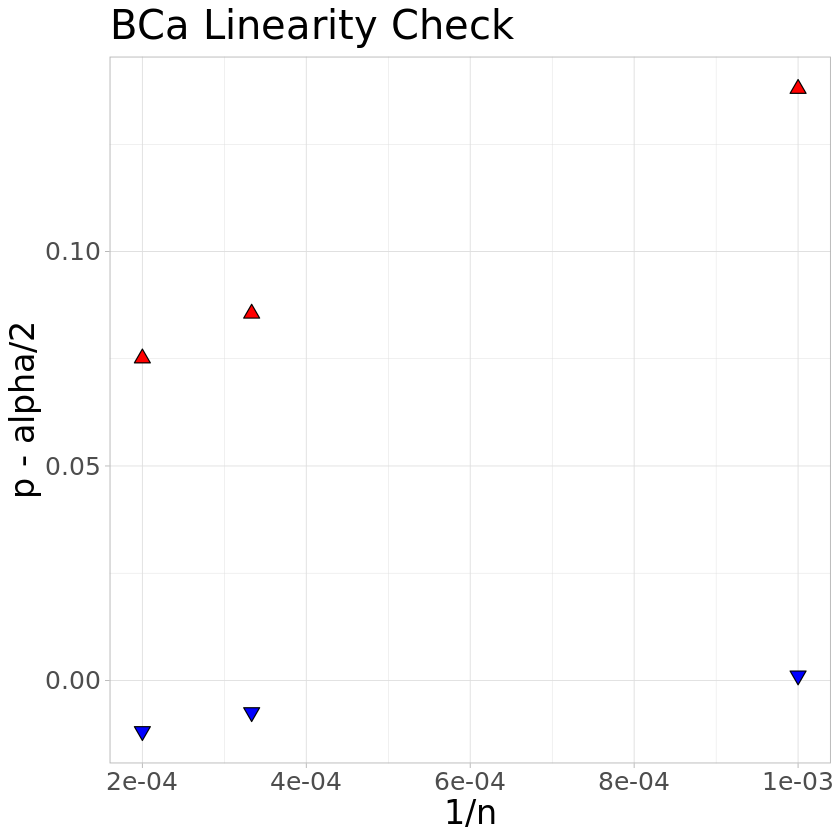

In [178]:
ggplot(df) + geom_point(aes(x = 1/n, y = bca_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/n, y = bca_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('BCa Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))

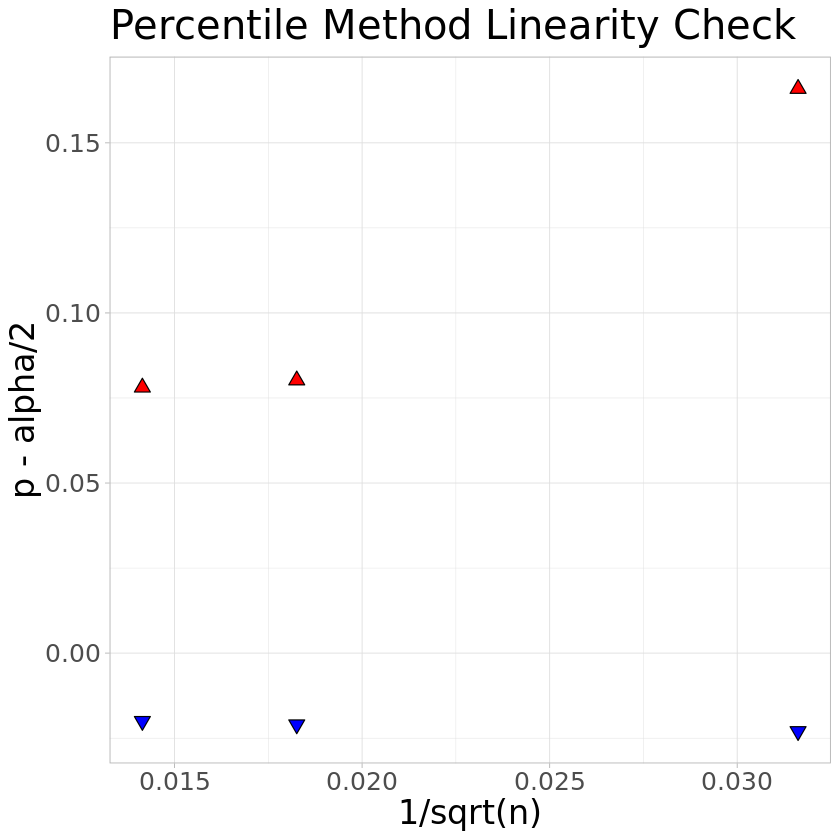

In [179]:
ggplot(df) + geom_point(aes(x = 1/sqrt(n), y = per_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/sqrt(n), y = per_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('Percentile Method Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


### B = 1000

Didn't do 1000 bootstrap replicates for this one, it seemed like the results were too weird/we would have to condition too much on the intersection occurring in the first place. Results not to be trusted.

## Fixing $X_{1} = 4.50$, Predict true $X_{2} = 6.38$

### B = 500

In [6]:
confints1000_500_2 <- readRDS(paste0(path, '1000_450_1_3_bivt_confints.RData'))
out1000_500_2 <- parseConfints(confints1000_500_2, 6.38, 1000, 500, na_tol)
confints3000_500_2 <- readRDS(paste0(path, '3000_450_1_3_bivt_confints.RData'))
out3000_500_2 <- parseConfints(confints3000_500_2, 6.38, 3000, 500, na_tol)
confints5000_500_2 <- readRDS(paste0(path, '5000_450_1_3_bivt_confints.RData'))
out5000_500_2 <- parseConfints(confints5000_500_2, 6.38, 5000, 500, na_tol)

In [171]:
lst2 <- vector(mode = 'list', length = 3)
lst2[[1]] <- out1000_500_2
lst2[[2]] <- out3000_500_2
lst2[[3]] <- out5000_500_2

In [172]:
gatherConfintRes(lst2, c(1000, 3000, 5000))

n,Percentile Coverage,Percentile Avg. Width,BCA Coverage,BCA Avg. Width
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,0.7867868,5.997567,0.8240647,16.445754
3000,0.8670000,3.075215,0.9070000,3.375929
5000,0.8780000,2.345879,0.9060000,2.477618


In [173]:
gatherNaRes(lst2, c(1000, 3000, 5000))

n,NA Percentile CIs,NA BCA CIs,NA Coords,NA Jackknifes
<dbl>,<int>,<int>,<int>,<int>
1000,1,11,253,11
3000,0,0,0,0
5000,0,0,0,0


### Linearity Check: Does the Coverage Rate Error Match Theory?

In [174]:
cvg_bcas <- matrix(rep(0, length(lst2)*2), ncol = 2)
cvg_pers <- matrix(rep(0, length(lst2)*2), ncol = 2)
alpha <- 0.05

true_coord <- 6.38

for (i in 1:nrow(cvg_bcas)) {
    
    n_confints_bca <- nrow(lst2[[i]]$confints_bca)
    cvg_bcas[i,] <- c(sum(lst2[[i]]$confints_bca[,1] > true_coord)/n_confints_bca, 
                  sum(lst2[[i]]$confints_bca[,2] < true_coord)/n_confints_bca)
    
    n_confints_per <- nrow(lst2[[i]]$confints_per)
    cvg_pers[i,] <- c(sum(lst2[[i]]$confints_per[,1] > true_coord)/n_confints_per, 
                  sum(lst2[[i]]$confints_per[,2] < true_coord)/n_confints_per)
    
}

df <- cbind(c(1000, 3000, 5000), data.frame(cvg_bcas), data.frame(cvg_pers))
colnames(df) <- c('n', 'bca_low', 'bca_high', 'per_low', 'per_high')

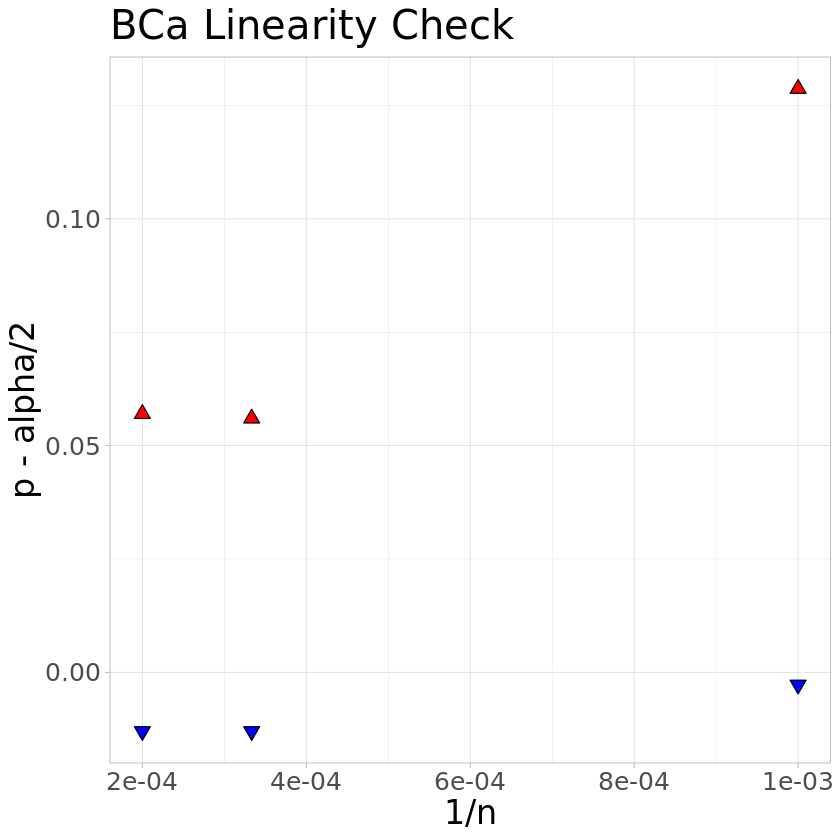

In [175]:
ggplot(df) + geom_point(aes(x = 1/n, y = bca_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/n, y = bca_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('BCa Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))

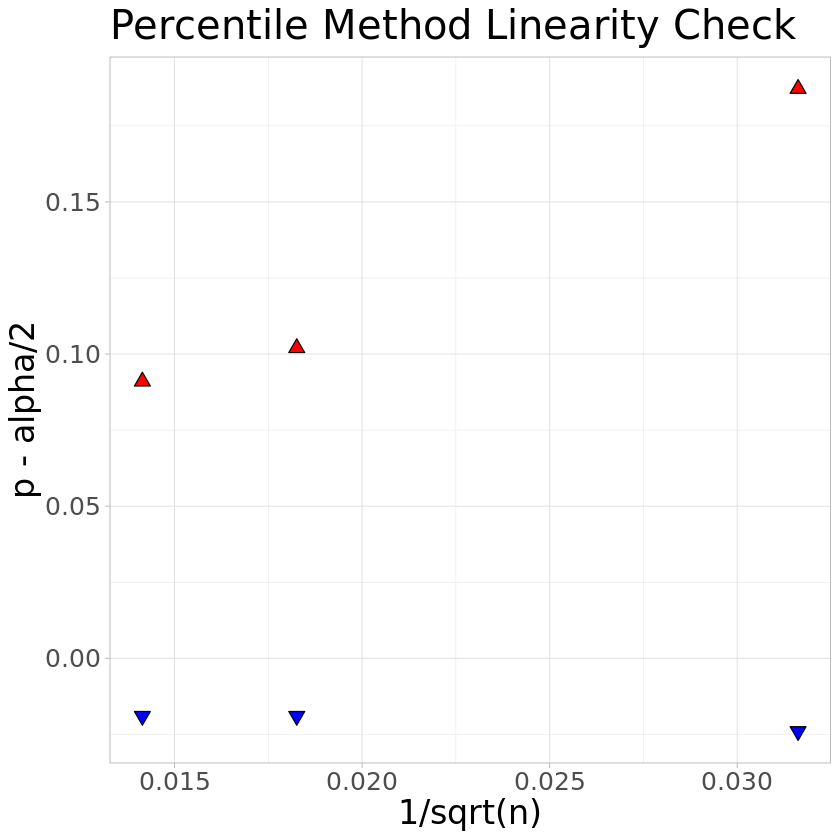

In [176]:
ggplot(df) + geom_point(aes(x = 1/sqrt(n), y = per_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/sqrt(n), y = per_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('Percentile Method Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


### B = 1000

In [7]:
confints1500_1000_2 <- readRDS(paste0(path, '1500n_1000boot_450_1_2_bivt_confints.RData'))
out1500_1000_2 <- parseConfints(confints1500_1000_2, 6.38, 2000, 1000, na_tol)
confints2000_1000_2 <- readRDS(paste0(path, '2000n_1000boot_450_1_2_bivt_confints.RData'))
out2000_1000_2 <- parseConfints(confints2000_1000_2, 6.38, 2000, 1000, na_tol)
confints2500_1000_2 <- readRDS(paste0(path, '2500n_1000boot_450_1_2_bivt_confints.RData'))
out2500_1000_2 <- parseConfints(confints2500_1000_2, 6.38, 2500, 1000, na_tol)
confints3000_1000_2 <- readRDS(paste0(path, '3000n_1000boot_450_1_2_bivt_confints.RData'))
out3000_1000_2 <- parseConfints(confints3000_1000_2, 6.38, 3000, 1000, na_tol)
confints5000_1000_2 <- readRDS(paste0(path, '5000n_1000boot_450_1_2_bivt_confints.RData'))
out5000_1000_2 <- parseConfints(confints5000_1000_2, 6.38, 5000, 1000, na_tol)
confints10000_1000_2 <- readRDS(paste0(path, '10000n_1000boot_450_1_2_bivt_confints.RData'))
out10000_1000_2 <- parseConfints(confints10000_1000_2, 6.38, 10000, 1000, na_tol)

In [9]:
lst2 <- vector(mode = 'list', length = 6)
lst2[[1]] <- out1500_1000_2
lst2[[2]] <- out2000_1000_2
lst2[[3]] <- out2500_1000_2
lst2[[4]] <- out3000_1000_2
lst2[[5]] <- out5000_1000_2
lst2[[6]] <- out10000_1000_2

In [10]:
gatherConfintRes(lst2, c(1500, 2000, 2500, 3000, 5000, 10000))

n,Percentile Coverage,Percentile Avg. Width,BCA Coverage,BCA Avg. Width
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1500,0.822,4.453532,0.8706118,5.753697
2000,0.833,3.797382,0.8800000,4.479397
2500,0.881,3.392237,0.9030000,3.844172
3000,0.868,3.069615,0.8910000,3.396580
5000,0.885,2.334140,0.9140000,2.465995
10000,0.904,1.668883,0.9160000,1.694262


In [11]:
gatherNaRes(lst2, c(1500, 2000, 2500, 3000, 5000, 10000))

n,NA Percentile CIs,NA BCA CIs,NA Coords,NA Jackknifes
<dbl>,<int>,<int>,<int>,<int>
1500,0,3,87,2
2000,0,0,26,0
2500,0,0,6,0
3000,0,0,0,0
5000,0,0,0,0
10000,0,0,0,0


### Linearity Check: Does the Coverage Rate Error Match Theory?

In [12]:
cvg_bcas <- matrix(rep(0, length(lst2)*2), ncol = 2)
cvg_pers <- matrix(rep(0, length(lst2)*2), ncol = 2)
alpha <- 0.05

true_coord <- 6.38

for (i in 1:nrow(cvg_bcas)) {
    
    n_confints_bca <- nrow(lst2[[i]]$confints_bca)
    cvg_bcas[i,] <- c(sum(lst2[[i]]$confints_bca[,1] > true_coord)/n_confints_bca, 
                  sum(lst2[[i]]$confints_bca[,2] < true_coord)/n_confints_bca)
    
    n_confints_per <- nrow(lst2[[i]]$confints_per)
    cvg_pers[i,] <- c(sum(lst2[[i]]$confints_per[,1] > true_coord)/n_confints_per, 
                  sum(lst2[[i]]$confints_per[,2] < true_coord)/n_confints_per)
    
}

df <- cbind(c(1500, 2000, 2500, 3000, 5000, 10000), data.frame(cvg_bcas), data.frame(cvg_pers))
colnames(df) <- c('n', 'bca_low', 'bca_high', 'per_low', 'per_high')


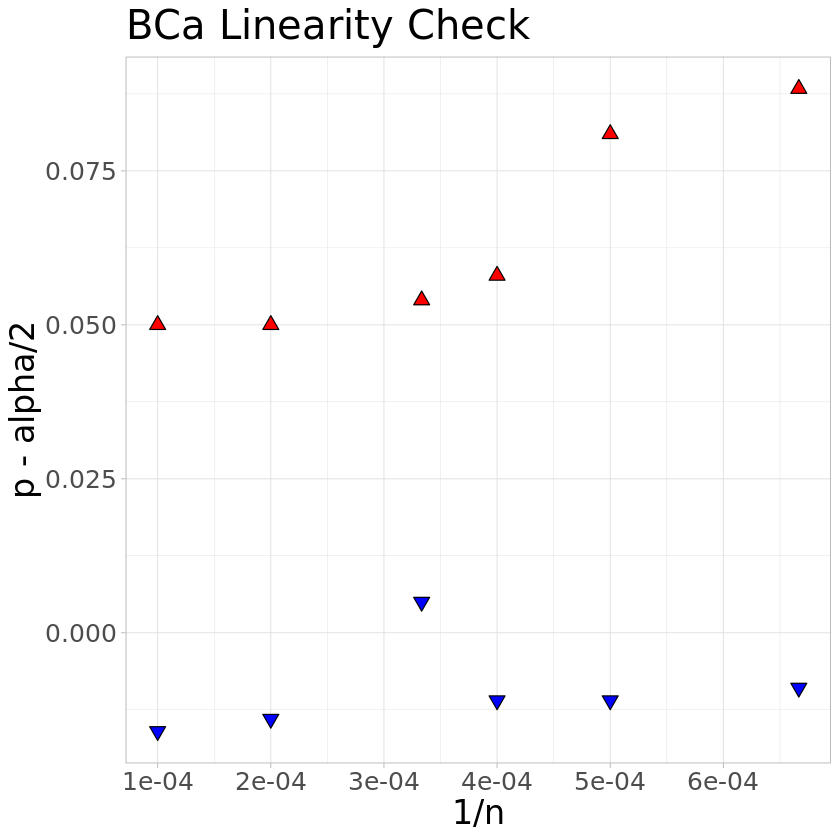

In [13]:
ggplot(df) + geom_point(aes(x = 1/n, y = bca_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/n, y = bca_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('BCa Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


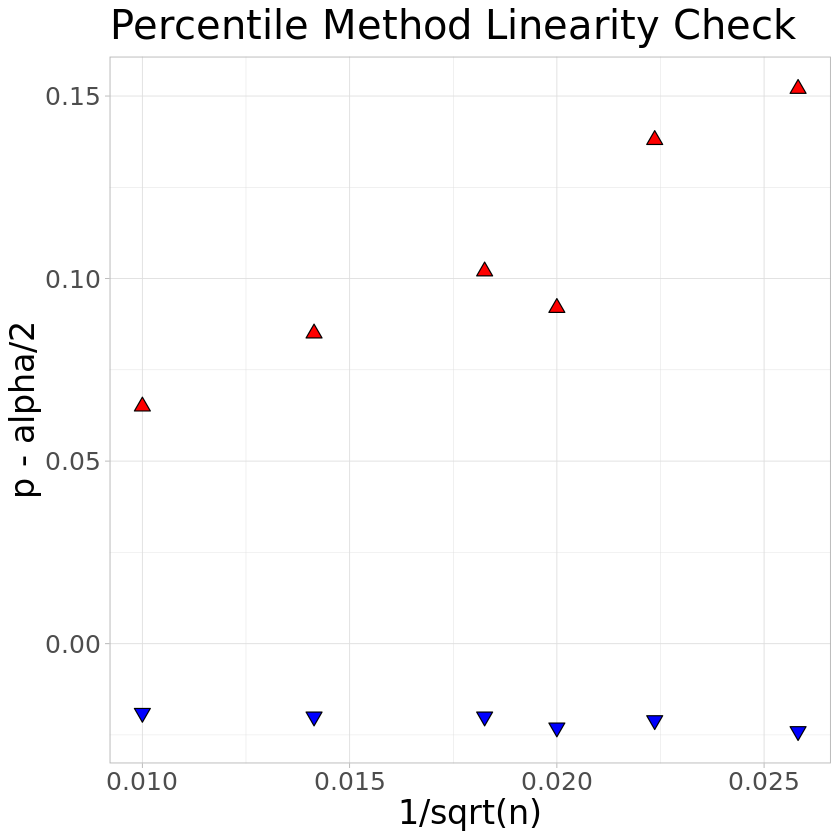

In [14]:
ggplot(df) + geom_point(aes(x = 1/sqrt(n), y = per_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/sqrt(n), y = per_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('Percentile Method Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


## Fixing $X_{2} = 0$, Predict true $X_{1} = 7.09$

### B = 500

In [151]:
confints1000_500_3 <- readRDS(paste0(path, '1000_0_2_3_bivt_confints.RData'))
out1000_500_3 <- parseConfints(confints1000_500_3, 7.09, 1000, 500, na_tol)

confints3000_500_3 <- readRDS(paste0(path, '3000_0_2_3_bivt_confints.RData'))
out3000_500_3 <- parseConfints(confints3000_500_3, 7.09, 3000, 500, na_tol)

confints5000_500_3 <- readRDS(paste0(path, '5000_0_2_3_bivt_confints.RData'))
out5000_500_3 <- parseConfints(confints5000_500_3, 7.09, 5000, 500, na_tol)

confints10000_500_3 <- readRDS(paste0(path, '10000n_500boot_0_2_2_bivt_confints.RData'))
out10000_500_3 <- parseConfints(confints10000_500_3, 7.09, 10000, 500, na_tol)

[1] "Indices of excluded pathological simulations: 82"


In [152]:
lst3 <- vector(mode = 'list', length = 4)
lst3[[1]] <- out1000_500_3
lst3[[2]] <- out3000_500_3
lst3[[3]] <- out5000_500_3
lst3[[4]] <- out10000_500_3

In [153]:
gatherConfintRes(lst3, c(1000, 3000, 5000, 10000))

n,Percentile Coverage,Percentile Avg. Width,BCA Coverage,BCA Avg. Width
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,0.7780000,6.278271,0.8660000,140.785229
3000,0.8460000,3.217168,0.8820000,3.738169
5000,0.8820000,2.433179,0.9170000,2.662813
10000,0.8948949,1.741511,0.9209209,1.813005


Note: did an extra run of $n = 10000$ with $B = 500$, coverage is still getting higher which is good.

In [154]:
gatherNaRes(lst3, c(1000, 3000, 5000, 10000))

n,NA Percentile CIs,NA BCA CIs,NA Coords,NA Jackknifes
<dbl>,<int>,<int>,<int>,<int>
1000,0,0,0,0
3000,0,0,0,0
5000,0,0,0,0
10000,0,0,0,0


### Linearity Check: Does Coverage Rate Error Match Theory?

In [155]:
cvg_bcas <- matrix(rep(0, length(lst3)*2), ncol = 2)
cvg_pers <- matrix(rep(0, length(lst3)*2), ncol = 2)
alpha <- 0.05

true_coord <- 7.09

for (i in 1:nrow(cvg_bcas)) {
    
    n_confints_bca <- nrow(lst3[[i]]$confints_bca)
    cvg_bcas[i,] <- c(sum(lst3[[i]]$confints_bca[,1] > true_coord)/n_confints_bca, 
                  sum(lst3[[i]]$confints_bca[,2] < true_coord)/n_confints_bca)
    
    n_confints_per <- nrow(lst3[[i]]$confints_per)
    cvg_pers[i,] <- c(sum(lst3[[i]]$confints_per[,1] > true_coord)/n_confints_per, 
                  sum(lst3[[i]]$confints_per[,2] < true_coord)/n_confints_per)
    
}

df <- cbind(c(1000, 3000, 5000, 10000), data.frame(cvg_bcas), data.frame(cvg_pers))
colnames(df) <- c('n', 'bca_low', 'bca_high', 'per_low', 'per_high')


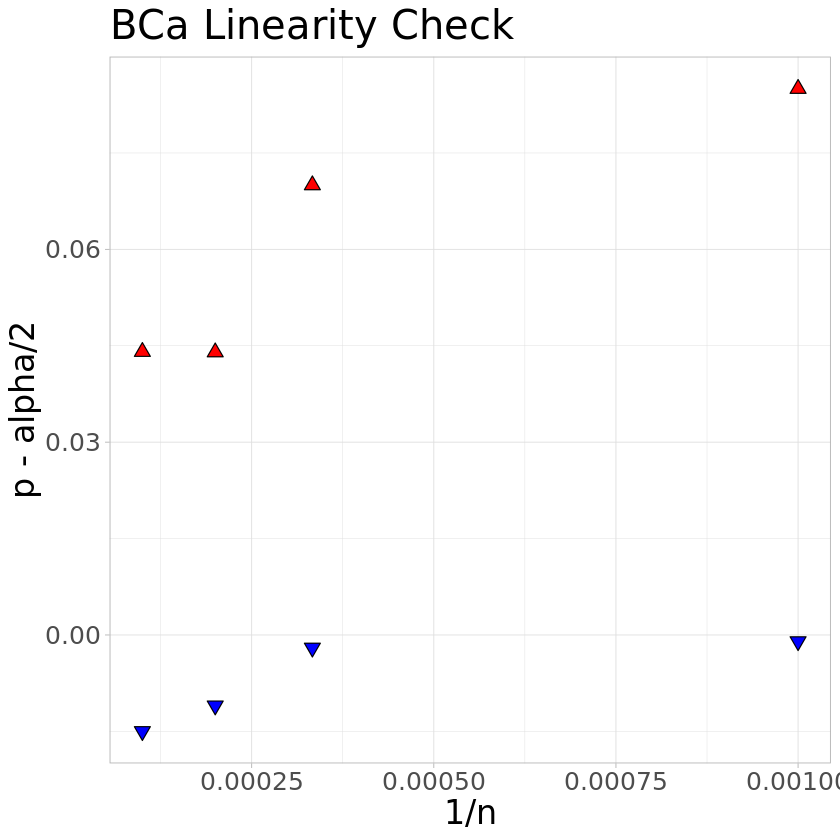

In [156]:
ggplot(df) + geom_point(aes(x = 1/n, y = bca_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/n, y = bca_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('BCa Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


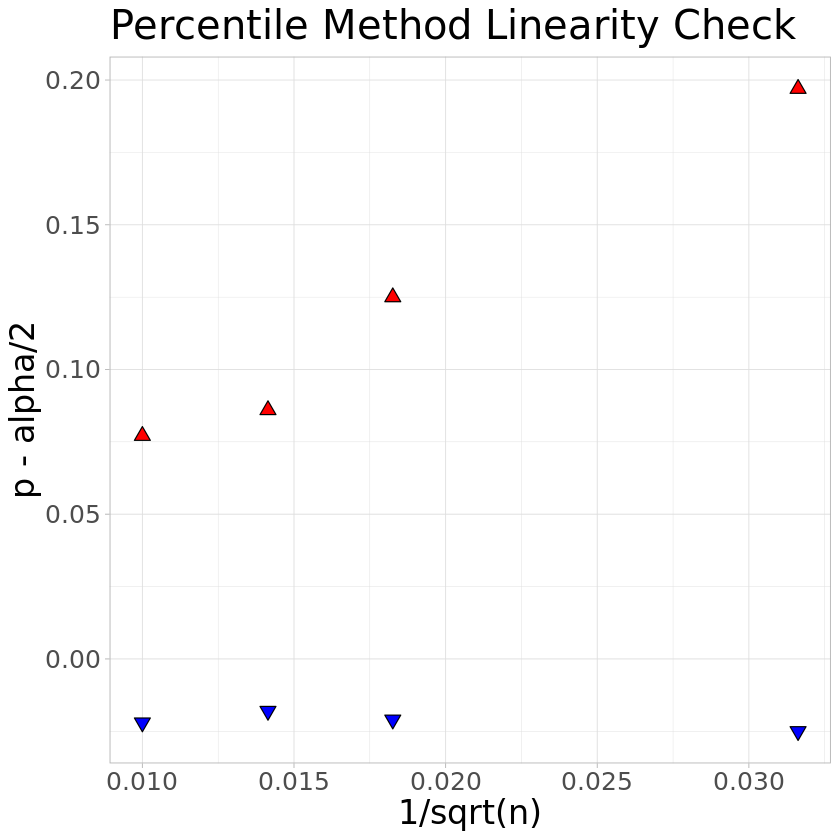

In [157]:
ggplot(df) + geom_point(aes(x = 1/sqrt(n), y = per_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/sqrt(n), y = per_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('Percentile Method Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


### Further Analysis: staggering width of BCa at low n

What's going on with the width?

### B = 1000

In [15]:
confints1000_1000_3 <- readRDS(paste0(path, '1000n_1000boot_0_2_2_bivt_confints.RData'))
out1000_1000_3 <- parseConfints(confints1000_1000_3, 7.09, 1000, 1000, na_tol)

confints1500_1000_3 <- readRDS(paste0(path, '1500n_1000boot_0_2_2_bivt_confints.RData'))
out1500_1000_3 <- parseConfints(confints1500_1000_3, 7.09, 1500, 1000, na_tol)

confints2000_1000_3 <- readRDS(paste0(path, '2000n_1000boot_0_2_2_bivt_confints.RData'))
out2000_1000_3 <- parseConfints(confints2000_1000_3, 7.09, 2000, 1000, na_tol)

confints2500_1000_3 <- readRDS(paste0(path, '2500n_1000boot_0_2_2_bivt_confints.RData'))
out2500_1000_3 <- parseConfints(confints2500_1000_3, 7.09, 2500, 1000, na_tol)

confints3000_1000_3 <- readRDS(paste0(path, '3000n_1000boot_0_2_2_bivt_confints.RData'))
out3000_1000_3 <- parseConfints(confints3000_1000_3, 7.09, 3000, 1000, na_tol)

confints5000_1000_3 <- readRDS(paste0(path, '5000n_1000boot_0_2_2_bivt_confints.RData'))
out5000_1000_3 <- parseConfints(confints5000_1000_3, 7.09, 5000, 1000, na_tol)

confints10000_1000_3 <- readRDS(paste0(path, '10000n_1000boot_0_2_2_bivt_confints.RData'))
out10000_1000_3 <- parseConfints(confints10000_1000_3, 7.09, 10000, 1000, na_tol)

[1] "Indices of excluded pathological simulations: 92"
[1] "Indices of excluded pathological simulations: 566"
[1] "Indices of excluded pathological simulations: 603"


In [16]:
lst3 <- vector(mode = 'list', length = 4)
lst3[[1]] <- out1000_1000_3
lst3[[2]] <- out1500_1000_3
lst3[[3]] <- out2000_1000_3
lst3[[4]] <- out2500_1000_3
lst3[[5]] <- out3000_1000_3
lst3[[6]] <- out5000_1000_3
lst3[[7]] <- out10000_1000_3

In [17]:
gatherConfintRes(lst3, c(1000, 1500, 2000, 2500, 3000, 5000, 10000))

n,Percentile Coverage,Percentile Avg. Width,BCA Coverage,BCA Avg. Width
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,0.7760000,6.615964,0.8820000,16.882798
1500,0.8000000,4.685312,0.8920000,7.402355
2000,0.8518519,4.091406,0.9049049,5.380319
2500,0.8530000,3.528212,0.8970000,4.288214
3000,0.8428428,3.191321,0.9049049,3.751391
5000,0.8728729,2.449689,0.9149149,2.696299
10000,0.9020000,1.743547,0.9230000,1.817808


In [18]:
gatherNaRes(lst3, c(1000, 1500, 2000, 2500, 3000, 5000, 10000))

n,NA Percentile CIs,NA BCA CIs,NA Coords,NA Jackknifes
<dbl>,<int>,<int>,<int>,<int>
1000,0,0,0,0
1500,0,0,0,0
2000,0,0,0,0
2500,0,0,0,0
3000,0,0,0,0
5000,0,0,0,0
10000,0,0,0,0


### Linearity Check: Does Coverage Rate Error Match Theory?

In [19]:
cvg_bcas <- matrix(rep(0, length(lst3)*2), ncol = 2)
cvg_pers <- matrix(rep(0, length(lst3)*2), ncol = 2)
alpha <- 0.05

true_coord <- 7.09

for (i in 1:nrow(cvg_bcas)) {
    
    n_confints_bca <- nrow(lst3[[i]]$confints_bca)
    cvg_bcas[i,] <- c(sum(lst3[[i]]$confints_bca[,1] > true_coord)/n_confints_bca, 
                  sum(lst3[[i]]$confints_bca[,2] < true_coord)/n_confints_bca)
    
    n_confints_per <- nrow(lst3[[i]]$confints_per)
    cvg_pers[i,] <- c(sum(lst3[[i]]$confints_per[,1] > true_coord)/n_confints_per, 
                  sum(lst3[[i]]$confints_per[,2] < true_coord)/n_confints_per)
    
}

df <- cbind(c(1000, 1500, 2000, 2500, 3000, 5000, 10000), data.frame(cvg_bcas), data.frame(cvg_pers))
colnames(df) <- c('n', 'bca_low', 'bca_high', 'per_low', 'per_high')


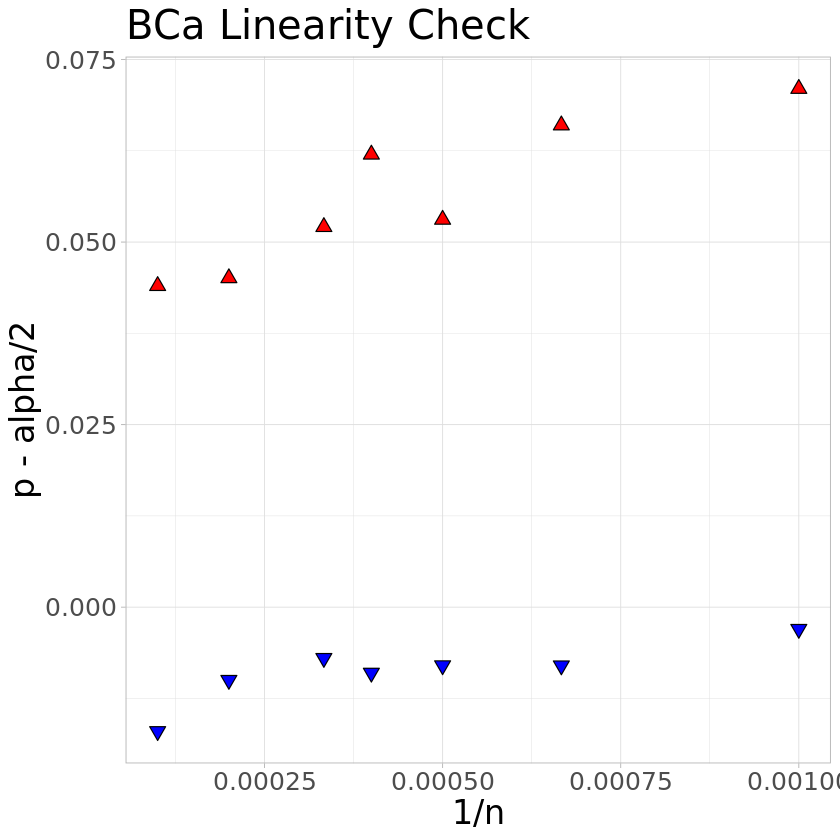

In [20]:
ggplot(df) + geom_point(aes(x = 1/n, y = bca_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/n, y = bca_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('BCa Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))



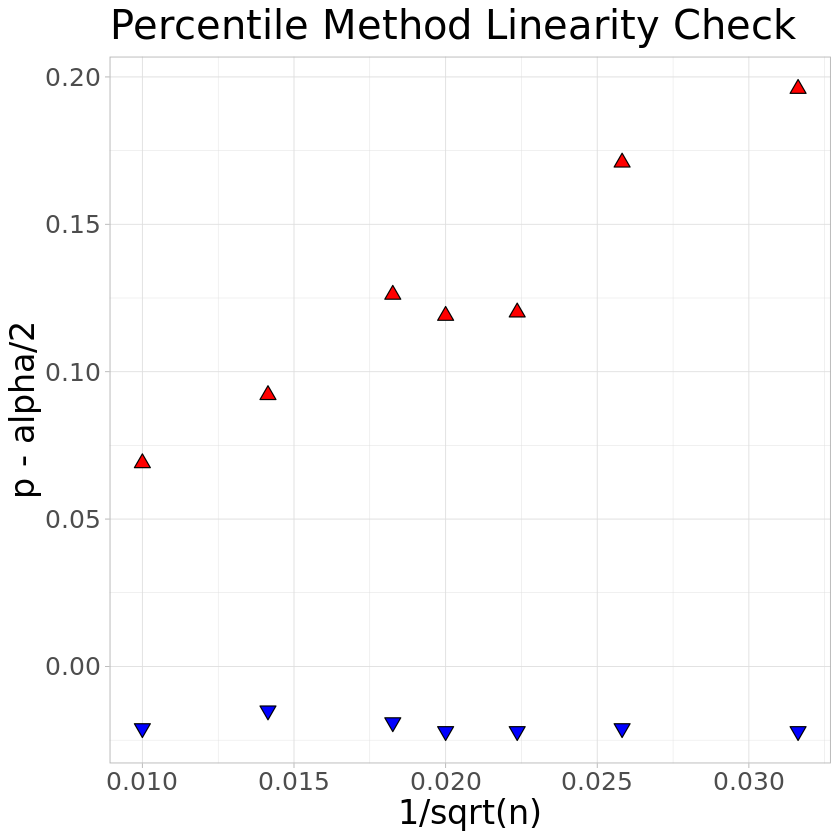

In [21]:
ggplot(df) + geom_point(aes(x = 1/sqrt(n), y = per_low - (alpha/2)), fill = 'blue', size = 3, shape = 25) + 
geom_point(aes(x = 1/sqrt(n), y = per_high - (alpha/2)), size = 3, fill = 'red', shape = 24) +
ggtitle('Percentile Method Linearity Check') + ylab('p - alpha/2') +
theme_light() +
theme(axis.title = element_text(size = 20), axis.text = element_text(size = 15), text = element_text(size = 20))


## Comparison with Paper Results

Running with 100 bootstrap samples, sample size of 10000, and repeating it 1000 times (so, basically the same as their methodology but instead of 200 samples I'm doing 1000, should be closer to the truth than theirs)

In [3]:
confints10000_1 <- readRDS(paste0(path, '10000_563_2_3_bivt_confints.RData'))
out10000_1 <- parseConfints(confints10000_1, 5.63)

confints10000_2 <- readRDS(paste0(path, '10000_450_1_3_bivt_confints.RData'))
out10000_2 <- parseConfints(confints10000_2, 6.38)

confints10000_3 <- readRDS(paste0(path, '10000_0_2_3_bivt_confints.RData'))
out10000_3 <- parseConfints(confints10000_3, 7.09)

In [22]:
splitConfints <- function(confints, fixed_coord, num_splits) {
    
    bca_covs <- rep(0, length = num_splits)
    per_covs <- rep(0, length = num_splits)

    for (i in 1:length(subout10000_1)) {
    
        start <- (i-1)*200 + 1
        end <- i*200
    
        subconfint <- confints[start:end]
        subout <- parseConfints(subconfint, fixed_coord)
        bca_covs[i] <- subout$cvg_bca
        per_covs[i] <- subout$cvg_per
        
        res <- rbind(bca_covs, per_covs)
    
    }
    
    return(res)
    
}

In [45]:
res_1 <- splitConfints(confints10000_1, 5.63, 5)
res_2 <- splitConfints(confints10000_2, 6.38, 5)
res_3 <- splitConfints(confints10000_3, 7.09, 5)

In [49]:
fixed_coords <- c(5.63, 4.50, 0)
paper_cov <- c(0.92, 0.89, 0.93)
avgs <- cbind(apply(res_1, 1, mean), apply(res_2, 1, mean), apply(res_3, 1, mean))
sds <- cbind(apply(res_1, 1, sd), apply(res_2, 1, sd), apply(res_3, 1, sd))

res_df <- data.frame(fixed_coords = fixed_coords,
                    paper_cov = paper_cov,
                    avg_cvg_bcas = avgs[1,],
                    sd_cvg_bcas = sds[1,],
                    avg_cvg_pers = avgs[2,],
                    sd_cvg_pers = sds[2,])

colnames(res_df) <- c('Fixed Coords.', 'Paper Coverage',
                      'Avg. BCa Coverage', 'SD BCa Coverage',
                      'Avg. Per. Coverage', 'SD Per. Coverage')



Takeaways: BCa interval performs marginally better than percentile, all results beneath the paper coverage results. This could be a result of:

1. The FFT-based approximation to the cdf in the method somehow messes up the initial survival function estimation compared to the old method, leading to worse estimates/intervals?

2. I'm using 5 times as many simulations as them, so maybe their results were higher because of sampling variability but my results are actually more trustworthy.